In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
"""Close, High, Low, Open, Volume"""
enddate = dt.datetime.now()
startdate = enddate - dt.timedelta(days = 365*5)
enddate, startdate
stocks = ['TSLA', 'BYDDF', 'NIO','RIVN']
df = yf.download(stocks, start = startdate, end = enddate)
df.head() 

[*********************100%***********************]  4 of 4 completed


Price           Close                                   High                  \
Ticker          BYDDF        NIO RIVN        TSLA      BYDDF        NIO RIVN   
Date                                                                           
2021-02-12  11.042498  59.849998  NaN  272.040009  11.142532  61.049999  NaN   
2021-02-16  11.129623  59.230000  NaN  265.406677  11.203842  62.139999  NaN   
2021-02-17  10.971505  57.320000  NaN  266.049988  11.213524  58.029999  NaN   
2021-02-18  10.503603  54.430000  NaN  262.459991  10.681082  56.380001  NaN   
2021-02-19  10.387434  55.040001  NaN  260.433319  10.645588  56.040001  NaN   

Price                         Low                                   Open  \
Ticker            TSLA      BYDDF        NIO RIVN        TSLA      BYDDF   
Date                                                                       
2021-02-12  272.443329  10.913420  59.099998  NaN  261.776672  10.984414   
2021-02-16  273.666656  11.058631  58.650002  NaN  264.146667  11.132850   
2021-02-17  266.613342  10.823068  55.900002  NaN  254.003326  11.174801   
2021-02-18  264.896667  10.348710  52.599998  NaN  258.756653  10.681082   
2021-02-19  265.596680  10.316442  54.099998  NaN  259.123322  10.503604   

Price                                    Volume                           
Ticker            NIO RIVN        TSLA    BYDDF       NIO RIVN      TSLA  
Date                                                                      
2021-02-12  60.259998  NaN  267.086670   523200  40233100  NaN  71304900  
2021-02-16  60.400002  NaN  272.666656   687600  55084100  NaN  59406900  
2021-02-17  57.919998  NaN  259.696655   963000  64196800  NaN  77989500  
2021-02-18  55.450001  NaN  260.299988  1023300  62505700  NaN  53871300  
2021-02-19  55.720001  NaN  265.000000   559500  43020700  NaN  56874900

In [3]:
"""Adjusted Close"""
df = yf.download(stocks, start=startdate, end=enddate, auto_adjust=False) #-------- Force yfinance to only show Adj Close
adj_close_prices = df['Adj Close']
adj_close_prices.head()

[*********************100%***********************]  4 of 4 completed


Ticker,BYDDF,NIO,RIVN,TSLA
Date,,,,
2021-02-12,11.042498,59.849998,NaN,272.040009
2021-02-16,11.129624,59.230000,NaN,265.406677
2021-02-17,10.971504,57.320000,NaN,266.049988
2021-02-18,10.503603,54.430000,NaN,262.459991
2021-02-19,10.387433,55.040001,NaN,260.433319


In [4]:
"""Calculate Daily & Cumulative Returns Visualization"""
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()

Ticker,BYDDF,NIO,RIVN,TSLA
Date,,,,
2021-02-12,NaN,NaN,NaN,NaN
2021-02-16,0.007859,-0.010413,NaN,-0.024686
2021-02-17,-0.014309,-0.032779,NaN,0.002421
2021-02-18,-0.043583,-0.051734,NaN,-0.013586
2021-02-19,-0.011122,0.011145,NaN,-0.007752


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

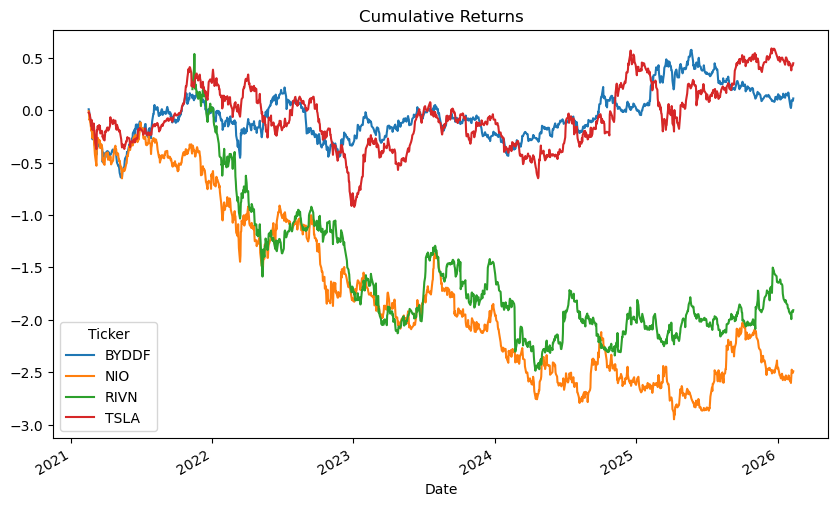

In [5]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.plot(title="Cumulative Returns", figsize=(10, 6))